In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install octave
!pip install oct2py
%load_ext oct2py.ipython

In [ ]:
# pacchetto eeglab

!git clone https://github.com/sccn/eeglab.git

Cloning into 'eeglab'...
remote: Enumerating objects: 74200, done.
remote: Counting objects: 100% (2341/2341), done.
remote: Compressing objects: 100% (935/935), done.
remote: Total 74200 (delta 1483), reused 2231 (delta 1403), pack-reused 71859
Receiving objects: 100% (74200/74200), 90.83 MiB | 12.09 MiB/s, done.
Resolving deltas: 100% (49053/49053), done.


In [ ]:
# pacchetto dipfit

!git clone https://github.com/sccn/dipfit.git

Cloning into 'dipfit'...
remote: Enumerating objects: 453, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 453 (delta 126), reused 129 (delta 71), pack-reused 252
Receiving objects: 100% (453/453), 12.48 MiB | 22.19 MiB/s, done.
Resolving deltas: 100% (245/245), done.


In [ ]:
from oct2py import octave

# import desired functions from EEGLAB TO Python

octave.addpath('/content/eeglab/functions/guifunc');
octave.addpath('/content/eeglab/functions/popfunc');
octave.addpath('/content/eeglab/functions/adminfunc');
octave.addpath('/content/eeglab/functions/sigprocfunc');
octave.addpath('/content/eeglab/functions/miscfunc');
# octave.addpath('/content/eeglab/plugins/dipfit');  --> vuota

octave.addpath('/content/dipfit');

# .set

In [ ]:
import scipy.io as sio
scipyEEG = sio.loadmat('/content/eeglab/sample_data/eeglab_data_epochs_ica.set')

list(scipyEEG.keys())
# scipyEEG['EEG'].ndim

['__header__', '__version__', '__globals__', 'EEG']

In [ ]:
octaveEEG= octave.pop_loadset('/content/eeglab/sample_data/eeglab_data_epochs_ica.set');

pop_loadset(): loading file /content/eeglab/sample_data/eeglab_data_epochs_ica.set ...
    eeg_checkset at line 187 column 1
    pop_loadset at line 244 column 9
    _pyeval at line 57 column 30

    eeg_hist at line 53 column 21
    eeg_checkset at line 1255 column 13
    pop_loadset at line 244 column 9
    _pyeval at line 57 column 30

    eeg_checkset at line 187 column 1
    pop_loadset at line 248 column 13
    _pyeval at line 57 column 30

Reading float file '/content/eeglab/sample_data/eeglab_data_epochs_ica.fdt'...
Scaling components to RMS microvolt


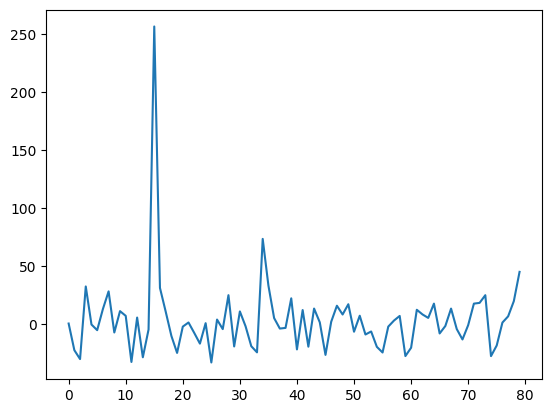

In [ ]:
# plot first trial of channel 1
import matplotlib.pyplot as plt
plt.plot(octaveEEG.data[0][0]);
plt.show()

# .mat

Non va bene la struttura del file mat

In [ ]:
import scipy.io as sio

data_mat=sio.loadmat('/content/S01_AD.mat');

In [ ]:
filename='/content/S01_AD.mat'

EEG_mat = octave.pop_importdata('data', filename, 'dataformat', 'matlab', 'srate', 128);

In [ ]:
EEG_mat = octave.pop_loadset('/content/S01_AD.mat');

pop_loadset(): loading file /content/S01_AD.mat ...
pop_loadset(): Incompatible with new format, trying old format and converting...


Oct2PyError: ignored

# .csv

In [ ]:
filename='S01_AD.csv'
path='/content/drive/MyDrive/eeg_DNN-Conti/eeg2_csv/'+filename

EEG = octave.pop_importdata('data', path, 'dataformat', 'ASCII', 'srate', 128);

pop_editset(): raw data file '/content/drive/MyDrive/eeg_DNN-Conti/eeg2_csv/S01_AD.csv' found
    eeg_checkset at line 187 column 1
    pop_editset at line 495 column 8
    pop_importdata at line 284 column 12
    _pyeval at line 57 column 30

eeg_checkset warning: number of columns in data (16) does not match the number of channels (0): corrected
eeg_checkset warning: 3rd dimension size of data (1) does not match the number of epochs (0), corrected
eeg_checkset warning: number of columns in data (177280) does not match the number of points (0): corrected
eeg_checkset note: upper time limit (xmax) adjusted so (xmax-xmin)*srate+1 = number of frames
    eeg_hist at line 53 column 21
    eeg_checkset at line 1255 column 13
    pop_editset at line 495 column 8
    pop_importdata at line 284 column 12
    _pyeval at line 57 column 30



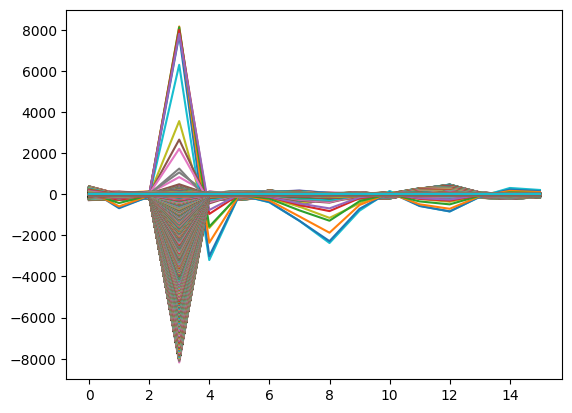

In [ ]:
import matplotlib.pyplot as plt
plt.plot(EEG.data);
plt.show()

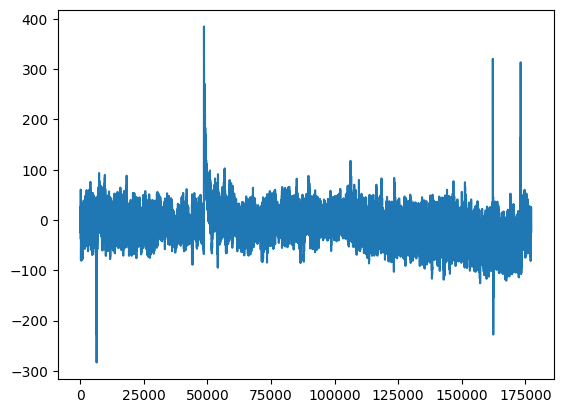

In [ ]:
plt.plot(EEG.data[0]);
plt.show()

# clean ICA

In [ ]:
# pacchetto firfilt

!git clone https://github.com/sccn/firfilt.git

Cloning into 'firfilt'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 395 (delta 34), reused 31 (delta 14), pack-reused 328
Receiving objects: 100% (395/395), 118.07 KiB | 3.03 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [ ]:
# pacchetto clean_rawdata

!git clone https://github.com/sccn/clean_rawdata.git


Cloning into 'clean_rawdata'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 401 (delta 14), reused 20 (delta 8), pack-reused 363
Receiving objects: 100% (401/401), 801.69 KiB | 9.43 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [ ]:
# pacchetto cleanline

!git clone https://github.com/sccn/cleanline.git

Cloning into 'cleanline'...
remote: Enumerating objects: 249, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 249 (delta 31), reused 233 (delta 23), pack-reused 0
Receiving objects: 100% (249/249), 830.33 KiB | 7.76 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
octave.addpath('/content/firfilt');
octave.addpath('/content/clean_rawdata');
octave.addpath('/content/cleanline');

## eegfiltnew

In [ ]:
# high pass filter at 0.2 Hz

EEGfilt = octave.pop_eegfiltnew(EEG, [],0.2,[],1,[],0);
EEGfilt = octave.eeg_checkset( EEGfilt );

pop_eegfiltnew() - performing 2113 point highpass filtering.
pop_eegfiltnew() - transition band width: 0.2 Hz
pop_eegfiltnew() - passband edge(s): 0.2 Hz
pop_eegfiltnew() - cutoff frequency(ies) (-6 dB): 0.1 Hz
pop_eegfiltnew() - filtering the data (zero-phase, non-causal)
firfilt(): |                    |   0%=                   /   5%, ETE 00:20=                  -  10%, ETE 00:15=                 \  15%, ETE 00:13=                |  20%, ETE 00:11=               /  25%, ETE 00:11=              -  30%, ETE 00:09=             \  35%, ETE 00:08=            |  40%, ETE 00:07=           /  45%, ETE 00:06=          -  50%, ETE 00:06=         \  55%, ETE 

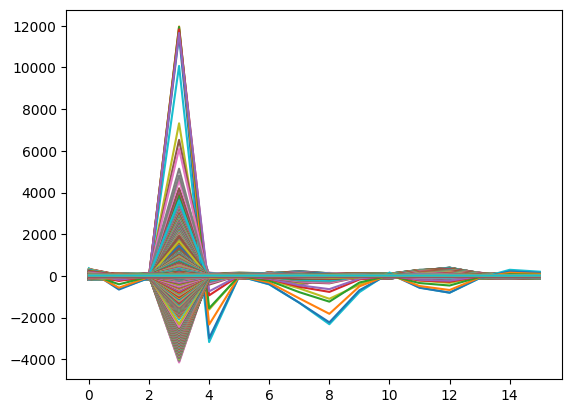

In [ ]:
import matplotlib.pyplot as plt
plt.plot(EEGfilt.data);
plt.show()

## cleanline

In [ ]:
EEG = octave.pop_cleanline(EEG, 'Bandwidth',2,'ChanCompIndices',range(int(EEG.nbchan)) ,
                    'SignalType','Channels','ComputeSpectralPower',True,'LineFrequencies',[60,120] ,
                    'NormalizeSpectrum',False,'LineAlpha',0.01,'PaddingFactor',2,'PlotFigures',False,
                    'ScanForLines',True,'SmoothingFactor',100,'VerbosityLevel',1,'SlidingWinLength',
                    EEG.pnts/EEG.srate,'SlidingWinStep',EEG.pnts/EEG.srate);

Oct2PyError: ignored

In [ ]:
# Line Noise

EEG = octave.pop_cleanline(EEG, 'bandwidth',2,'ChanCompIndices',[1 :EEG.nbchan],'computepower',1,
                          'linefreqs',[50,100,150] ,'normSpectrum',0,'p',0.01,'pad',2,
                          'plotfigures',0,'scanforlines',1,'sigtype','Channels','tau',100,
                          'verb',0,'winsize',4,'winstep',1,'ComputeSpectralPower','False');


SyntaxError: ignored

In [ ]:
EEG = octave.pop_cleanline(EEG, 'bandwidth',2,'chanlist'[1:EEG.nbchan],'computepower',1,
                          'linefreqs',[50,100,150] ,'normSpectrum',0,'p',0.01,'pad',2,
                          'plotfigures',0,'scanforlines',1,'sigtype','Channels','tau',100,
                          'verb',0,'winsize',4,'winstep',1,'ComputeSpectralPower',0);

TypeError: ignored

In [ ]:
int(EEG.nbchan)

16

In [ ]:
EEG = octave.pop_cleanline(EEG, 'Bandwidth',2,'ChanCompIndices',[1:EEG.nbchan],
                          'SignalType','Channels','ComputeSpectralPower',true,
                          'LineFrequencies',[60 120] ,'NormalizeSpectrum',false,
                          'LineAlpha',0.01,'PaddingFactor',2,'PlotFigures',false,
                          'ScanForLines',true,'SmoothingFactor',100,'VerboseOutput',1,
                          'SlidingWinLength',EEG.pnts/EEG.srate,'SlidingWinStep',EEG.pnts/EEG.srate);


SyntaxError: ignored

In [ ]:
EEG = octave.eeg_checkset(EEG);

    eeg_checkset at line 187 column 1
    _pyeval at line 57 column 30



## run ICA

In [ ]:
EEG

{'setname': '',
 'filename': '',
 'filepath': '',
 'subject': '',
 'group': '',
 'condition': '',
 'session': [],
 'comments': '',
 'nbchan': 16.0,
 'trials': 1.0,
 'pnts': 177280.0,
 'srate': 128.0,
 'xmin': 0.0,
 'xmax': 1384.9921875,
 'times': array([[0.00000000e+00, 7.81250000e+00, 1.56250000e+01, ...,
         1.38497656e+06, 1.38498438e+06, 1.38499219e+06]]),
 'data': array([[25.01354, 25.01354, 25.01354, ..., 25.01354, 25.01354, 25.01354],
        [25.01354, 25.01354, 25.01354, ..., 25.01354, 25.01354, 25.01354],
        [25.01354, 25.01354, 25.01354, ..., 25.01354, 25.01354, 25.01354],
        ...,
        [25.01354, 25.01354, 25.01354, ..., 25.01354, 25.01354, 25.01354],
        [25.01354, 25.01354, 25.01354, ..., 25.01354, 25.01354, 25.01354],
        [25.01354, 25.01354, 25.01354, ..., 25.01354, 25.01354, 25.01354]],
       dtype=float32),
 'icaact': [],
 'icawinv': [],
 'icasphere': [],
 'icaweights': [],
 'icachansind': [],
 'chanlocs': [],
 'urchanlocs': [],
 'chaninfo': 

In [ ]:
octave.addpath('/content/eeglab/functions/popfunc');

In [ ]:
# run ICA to evaluate components this time
EEG_ica = octave.pop_runica(EEG, 'extended',1,'interupt','on');

    eeg_checkset at line 187 column 1
    pop_runica at line 308 column 9
    _pyeval at line 57 column 30


Attempting to convert data matrix to double precision for more accurate ICA results.

Input data size [16,177280] = 16 channels, 177280 frames/nFinding 16 ICA components using extended ICA.
Kurtosis will be calculated initially every 1 blocks using 6000 data points.
Decomposing 692 frames per ICA weight ((256)^2 = 177280 weights, Initial learning rate will be 0.001, block size 61.
Learning rate will be multiplied by 0.98 whenever angledelta >= 60 deg.
More than 32 channels: default stopping weight change 1E-7
Training will end when wchange < 1e-06 or after 512 steps.
Online bias adjustment will be used.
Removing mean of each channel ...
Final training data range: -8156.36 to 8187.42
Computing the sphering matrix...
Starting weights are the identity matrix ...
Sphering the data ...
Beginning ICA training ... first training step may be slow ...
    uicontrol at line 122 column 8
 

Oct2PyError: ignored